# 00 - Preparations

In [ ]:
import torch
from ultralytics import YOLO

# 01 - Training

https://docs.ultralytics.com/modes/train/#train-settings

In [ ]:
# Load the YOLO model as a starting point
model = YOLO("yolo11s-seg.pt")

# Train the model on the dataset
results = model.train(
    data="config/config_train.yaml",
    epochs=200,
    patience=0,
    project='models',
    name='yolo11s_250imgs_200epochs',
    device=[-1, -1],
    )

# 02 - Test model on image

In [ ]:
# Load the best model from training
best_model = YOLO("runs/segment/train/weights/best.pt")

In [ ]:
# Inference on an image
results = best_model.predict(
    source="test_image.png",
    save=True,
    #show_boxes=False,
    )

# 03 - Import annotation as tensor

In [7]:
import numpy as np
import torch
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

In [2]:
def load_yolo_polygon_mask_onehot(txt_path, img_path, num_classes):
    img = Image.open(img_path)
    w, h = img.size
    mask = np.zeros((num_classes, h, w), dtype=np.uint8)

    with open(txt_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            cls = int(parts[0])
            coords = list(map(float, parts[1:]))
            xy = [(coords[i]*w, coords[i+1]*h) for i in range(0, len(coords), 2)]
            img_mask = Image.new('L', (w, h), 0)
            ImageDraw.Draw(img_mask).polygon(xy, outline=1, fill=1)
            mask[cls] = np.maximum(mask[cls], np.array(img_mask))

    return torch.from_numpy(mask)

In [3]:
# Example usage:
txt_path = "dataset/labels/train/0dd04bcc-1345605_5914635.txt"
img_path = "dataset/images/train/0dd04bcc-1345605_5914635.jpg"  # Adjust extension if needed
num_classes = 2  # Set to the number of classes in your dataset
mask_tensor = load_yolo_polygon_mask_onehot(txt_path, img_path, num_classes)
print(mask_tensor.shape)  # (num_classes, H, W)

torch.Size([2, 640, 640])


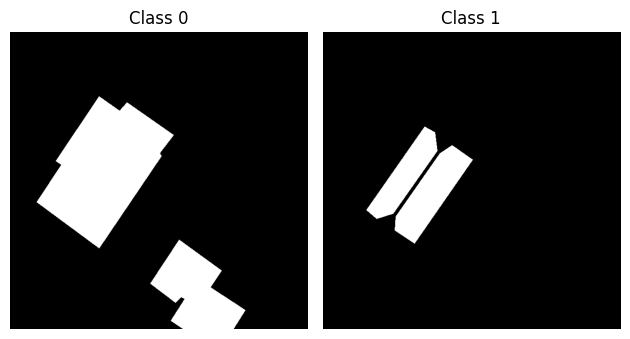

In [9]:
# Plot the mask for visualization
def plot_mask(mask_tensor):
    num_classes, h, w = mask_tensor.shape
    fig, axes = plt.subplots(1, num_classes)
    
    for i in range(num_classes):
        axes[i].imshow(mask_tensor[i].numpy(), cmap='gray')
        axes[i].set_title(f'Class {i}')
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

plot_mask(mask_tensor)